# Выявим определяющие успешность игры закономерности:

## Описание проекта:

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Нам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.


Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы
планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируем ли продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

### Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла:

### Импорт библиотек и чтение файлов:

In [1]:
# Импорт библиотек:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import math as mt
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})

from math import ceil
from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Чтение фалов:
try:
    data = pd.read_csv(
        '/home/saxofon/Документы/jupdata/games.csv')
except:
    data = pd.read_csv(
        '/datasets/games.csv')

### Обзор таблицы:

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Обзор столбцов:

In [6]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [7]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

С жанрами и рейтингом всё в порядке, также можем заметить 0 продаж, давайте проверим, есть ли игры по которым нет данных о продажах вовсе:

In [8]:
print('Игры без продаж:', len(data.query('NA_sales == 0 and EU_sales == 0 and JP_sales == 0 and Other_sales == 0')))

Игры без продаж: 2


Всего 2 игры, на конечный результат они никак не повлияют, потому оставим их в датасете.

In [9]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Больше всего игр в таблице с PC2, DC, и PC3

In [10]:
# Выведем талбицу с отсутсвующим годом выпуска:
display(data[data['Year_of_Release'].isna()])
print('Пропуски в Year_of_Release:', data['Year_of_Release'].isna().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в Year_of_Release: 269


Попробуем посмотреть, возможно получится получить год выхода игры, взяв данные с других платформ, проверим эту гипотезу:

In [11]:
data.query('Name == "FIFA Soccer 2004"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Попробуем далее присвоить отсутствующие значения, на этапе предобработки данных.

In [12]:
print('Процент пропусков в User_Score:', round((data['User_Score'].isna().sum() / len(data['Name'])) * 100))
print('Процент пропусков в Critic_Score:', round((data['Critic_Score'].isna().sum() / len(data['Name'])) * 100))
print('Процент пропусков в Rating:', round((data['Rating'].isna().sum() / len(data['Rating'])) * 100))

Процент пропусков в User_Score: 40
Процент пропусков в Critic_Score: 51
Процент пропусков в Rating: 40


Выводы по данным:

- Year_of_Release - Есть пустые строки, попробуем восстановить некоторые данные.
- Name и Genre - Всего 2 пропуска, также удалим эти строки.
- Пропуски в Critic_Score и User_Score не имеет смысла пытаться восстановить, так как применение среднего или медианы будет не совсем корректным решением, которое может повлиять на расчеты в дальнейшем исследовании, потому оставим как есть. 
- В столбце User_Score встречается аббревиатура tbd что означает: To Be Determined, то есть "Будет определено", значит такие строки можно сменить на NaN
- Приведём наименования столбцов к общему регистру.
- Year_of_Release приведём в int, User_Score в float.
- Пропуски в Rating заменим на NV, что означает - нет значений

## Предобработка данных:

### Приведём наименования столбцов к общему регистру:

In [13]:
# Столбцы:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [14]:
# Также приведём к нижнему регистру строки в столбцах:
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()

### user_score приведём в float, удалим лишние строки:

In [15]:
# Удалим строки:
data.dropna(subset=['name'],inplace=True)
data.dropna(subset=['genre'],inplace=True)

data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
# user_score приведём в float

data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype(float)

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### year_of_release попробуем восстановить данные:

In [17]:
# Напишем цикл, который пройдётся по всем пустым строкам и попробует присвоить им значения:
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

# Проверим, сколько строк успешно преобразовали:
data['year_of_release'].isna().sum()

146

In [18]:
# Удалим пропуски, так как они составляют всего 0.8%
data.dropna(subset=['year_of_release'],inplace=True)

data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Пропуски в Rating

In [19]:
data['rating'] = data['rating'].replace(np.nan, 'nv', regex=True)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,nv
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,nv
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,nv
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,nv


### Сменим тип данных:

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int32')
data['na_sales'] = data['na_sales'].astype('float32')
data['eu_sales'] = data['eu_sales'].astype('float32')
data['jp_sales'] = data['jp_sales'].astype('float32')
data['other_sales'] = data['other_sales'].astype('float32')
data['critic_score'] = data['critic_score'].astype('float32')
data['user_score'] = data['user_score'].astype('float32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float32
 5   eu_sales         16567 non-null  float32
 6   jp_sales         16567 non-null  float32
 7   other_sales      16567 non-null  float32
 8   critic_score     8075 non-null   float32
 9   user_score       7540 non-null   float32
 10  rating           16567 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 970.8+ KB


### Создадим столбец с суммарными продажами игр:

In [21]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,e,82.539993
1,super mario bros.,nes,1985,platform,29.080000,3.580000,6.81,0.77,NaN,NaN,nv,40.240002
2,mario kart wii,wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,e,35.520000
3,wii sports resort,wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,e,32.770000
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270000,8.890000,10.22,1.00,NaN,NaN,nv,31.380001
5,tetris,gb,1989,puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,nv,30.260000
6,new super mario bros.,ds,2006,platform,11.280000,9.140000,6.50,2.88,89.0,8.5,e,29.799999
7,wii play,wii,2006,misc,13.960000,9.180000,2.93,2.84,58.0,6.6,e,28.910000
8,new super mario bros. wii,wii,2009,platform,14.440000,6.940000,4.70,2.24,87.0,8.4,e,28.319998
9,duck hunt,nes,1984,shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,nv,28.309999


In [22]:
# Проверим дубликаты:
data.duplicated().sum()

0

## Проведем исследовательский анализ данных:

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"
- Возьмем данные за соответствующий актуальный период. Актуальный период опередим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. (Не будем учитывать в работе данные за предыдущие годы.)
- Ответим на вопрос: "Какие платформы лидируют по продажам, растут или падают?". Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Соотнести выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можем сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Cколько игр выпускалось в разные годы:

Text(0, 0.5, 'Количество игр')

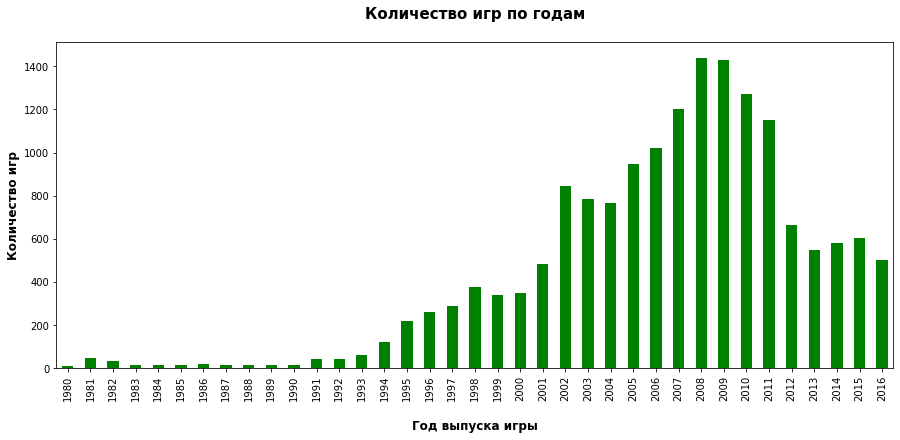

In [23]:
game_per_yaer = data.pivot_table(index='year_of_release', aggfunc={'name':'count'})
game_per_yaer.columns = ['counts']

game_per_yaer.plot(y='counts', kind='bar', color='green', figsize=(15, 6), legend=False)

plt.title(label='Количество игр по годам\n', fontsize=15, fontweight="bold")
plt.xlabel("\nГод выпуска игры", fontsize=12, fontweight="bold")
plt.ylabel("Количество игр", fontsize=12, fontweight="bold")

- Рост индустрии начался с 1990 г, и далее рос огромными темпами.
- По графику можно заметить, что количество игр резко стало расти примерно в 1993, и второй такой скачок пришелся на 2000.
- Сильные спады в разработке пришлись на 2003, в 2010 также начался резкий спад. Возможно это связано с тем, что бюджеты игр стали увеличиваться, как и сам рынок, и маленькие фирмы были поглощены гигантами индустрии.
- Так как новая тенденция стала видна после 2014 года, возьмём данные с этого года за актуальные на рынке.
- Данные за все периоды конечно важны, но для нашего исследования можно оставить данные после 2014 г, так как это год в котором представлены данные по абсолютно всем самым популярным консолям.

### Как менялись продажи по платформам:

Text(0, 0.5, 'Продажи')

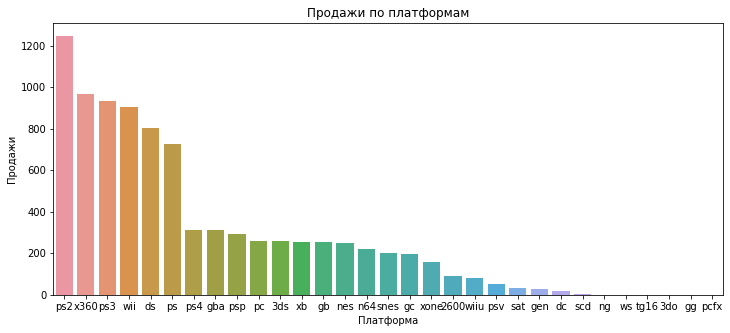

In [24]:
platform_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', 
                                                                                                   ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x = platform_sales.index, y = platform_sales['sum_sales'])
plt.title("Продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Продажи")

In [25]:
# Для наглядности и удобства, создадим таблицу:
platform_pivot = data.pivot_table(index=['platform'], aggfunc={'sum_sales':sum}).nlargest(15, columns='sum_sales')
platform_pivot

,sum_sales
platform,
ps2,1247.160034
x360,966.609985
ps3,935.190002
wii,903.309998
ds,804.280029
ps,727.580017
ps4,314.140015
gba,313.730011
psp,293.570007


In [26]:
# Список всех платформ:
platform_grp = platform_sales.reset_index()
platforms_lst = platform_grp['platform'].unique()
platforms_lst

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

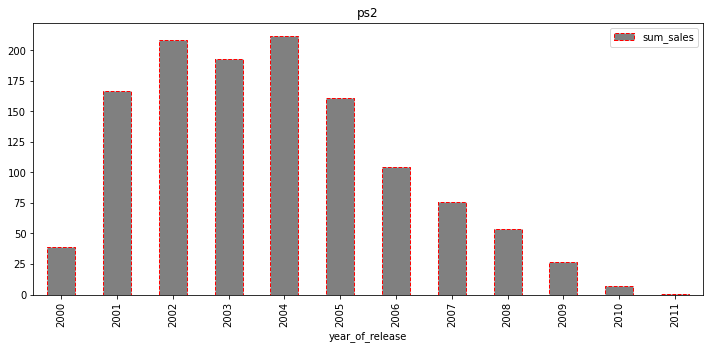

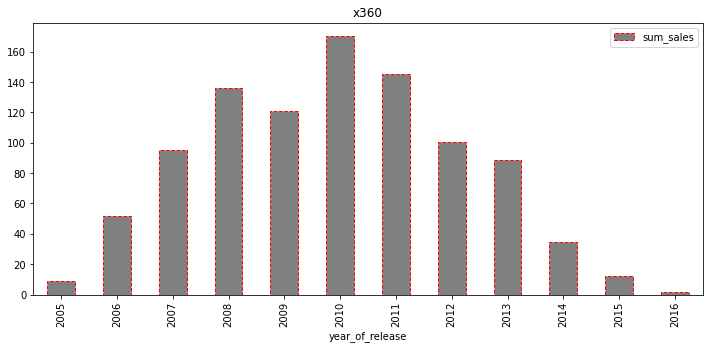

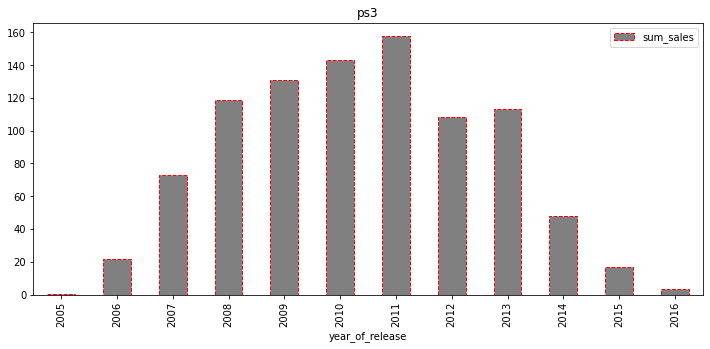

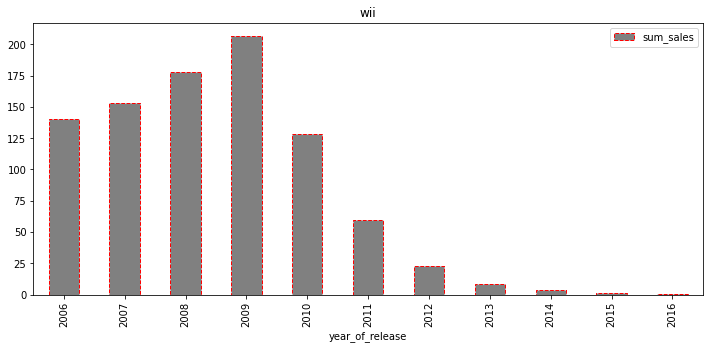

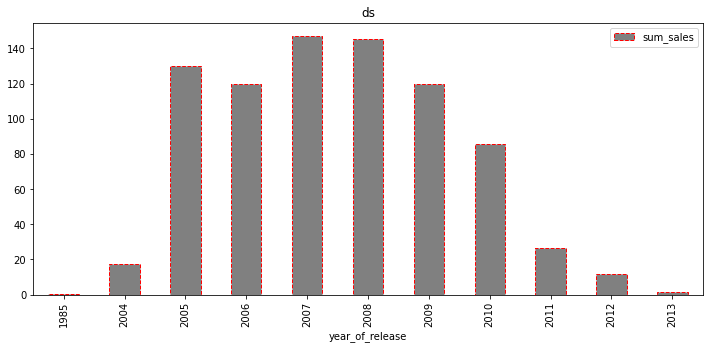

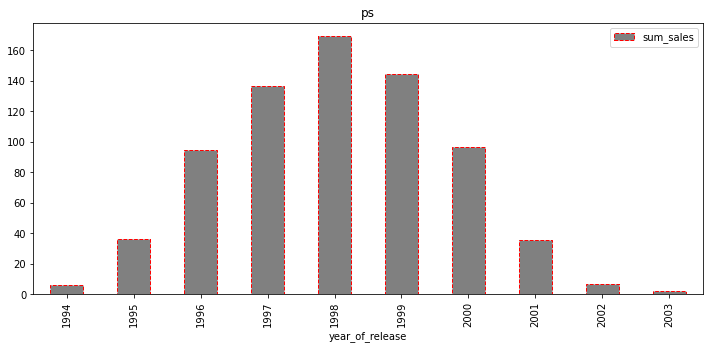

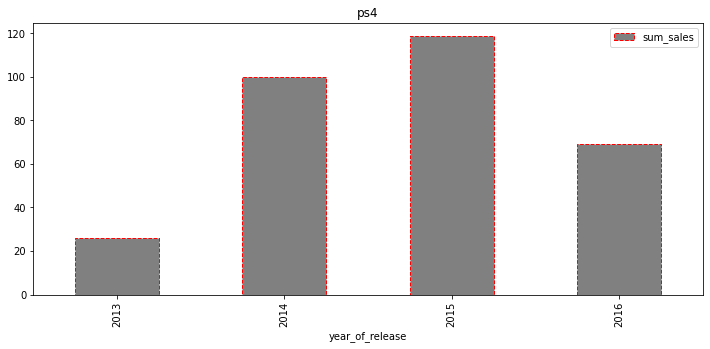

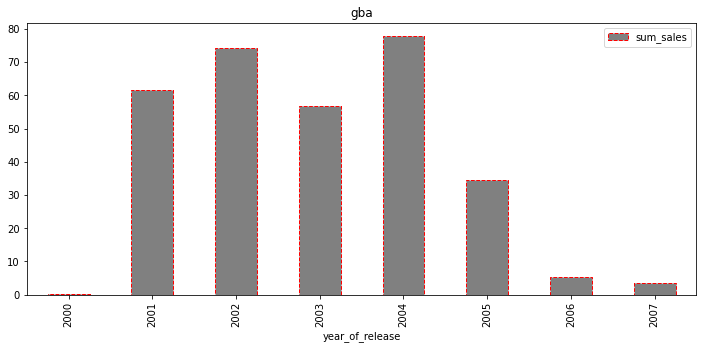

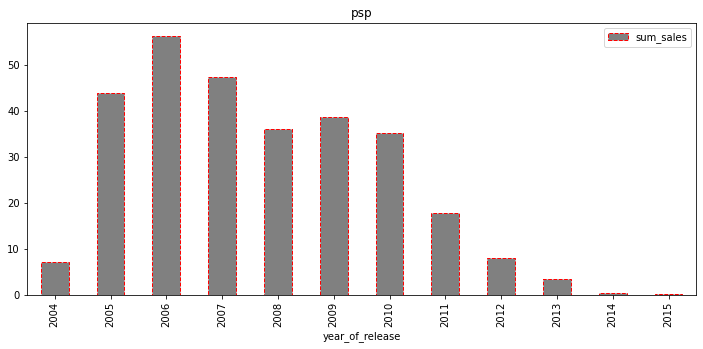

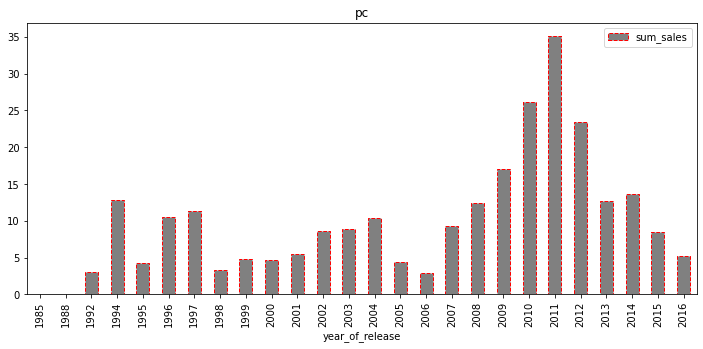

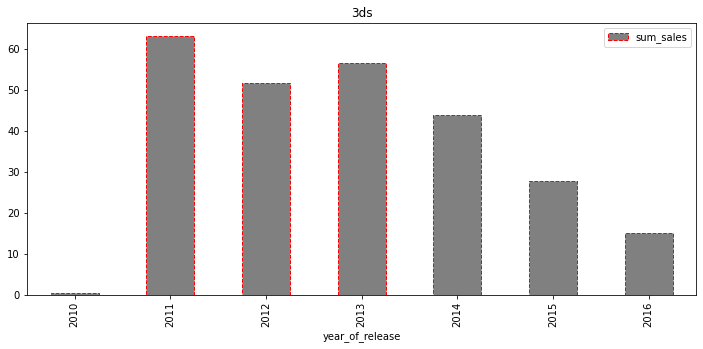

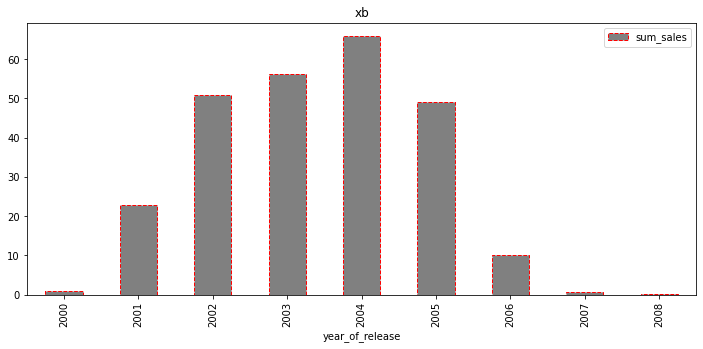

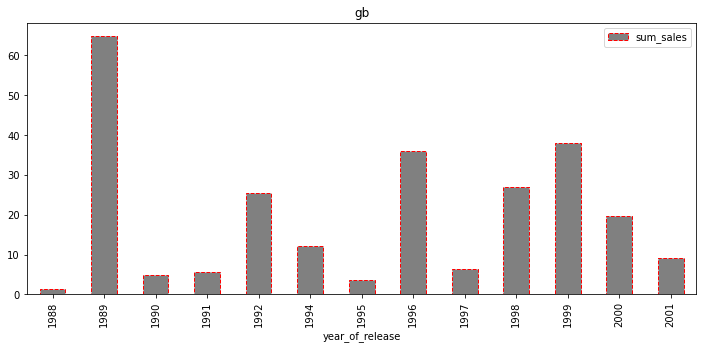

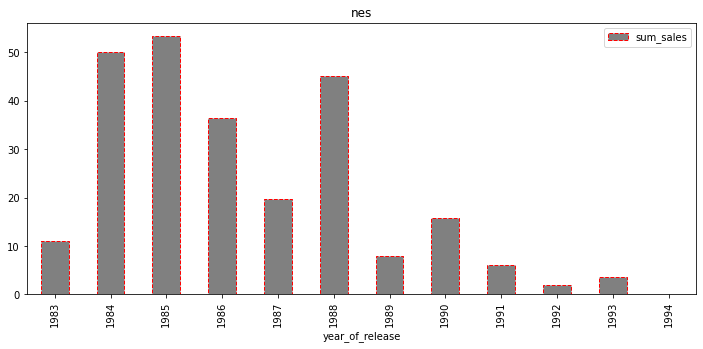

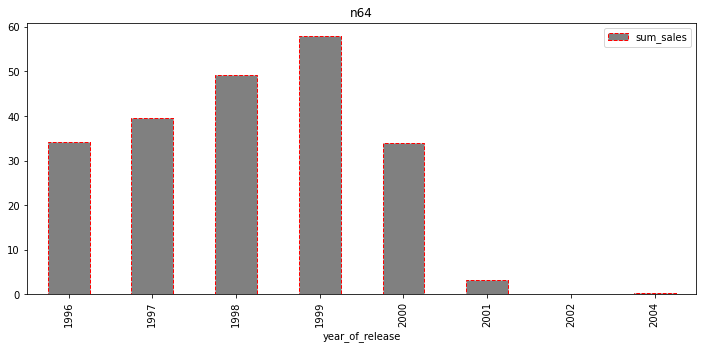

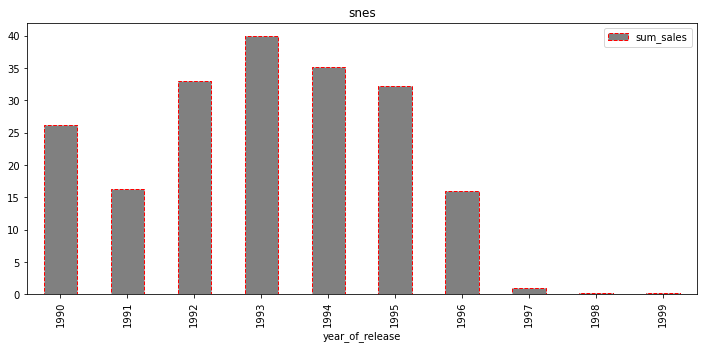

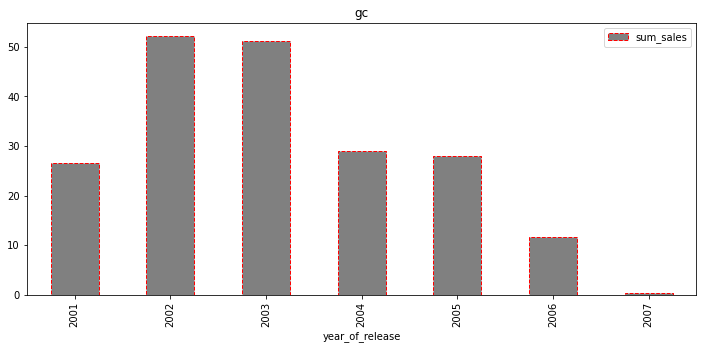

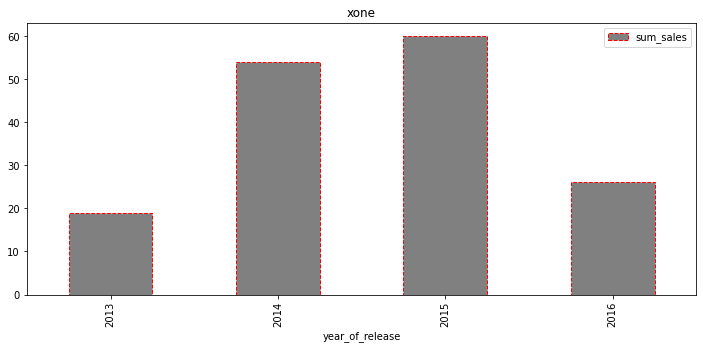

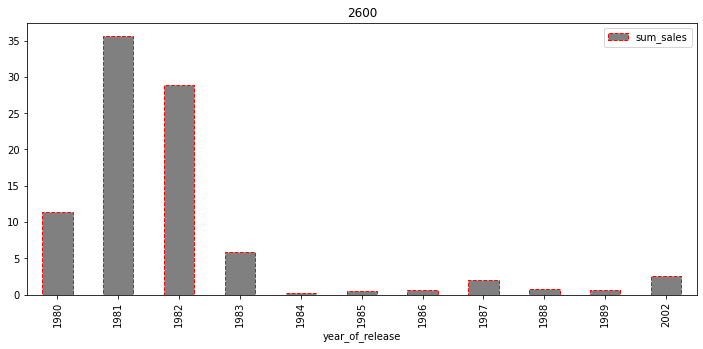

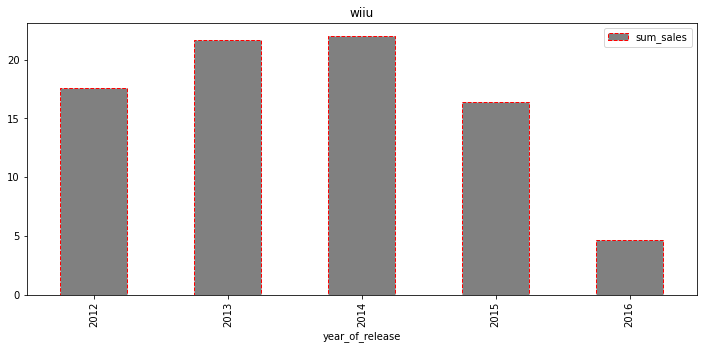

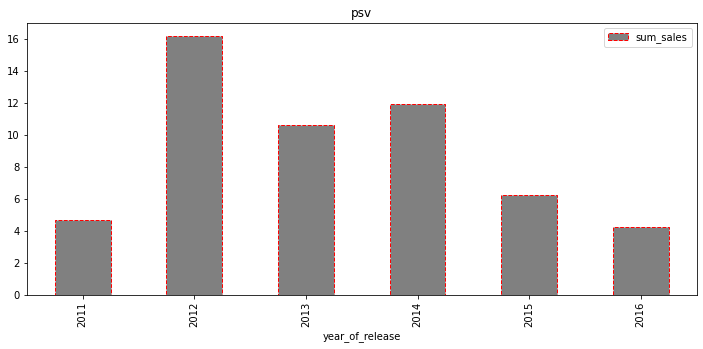

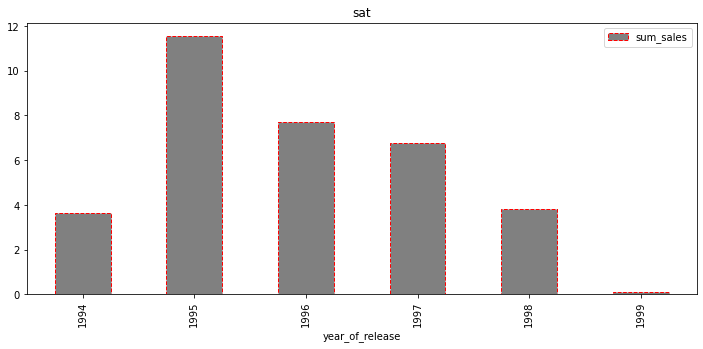

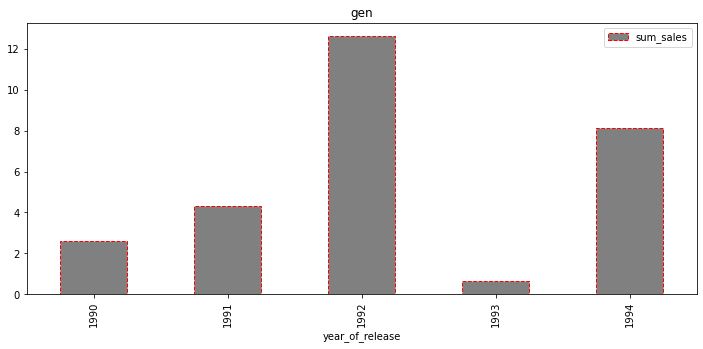

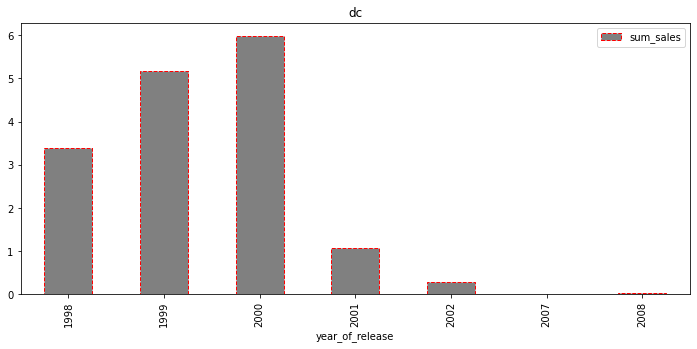

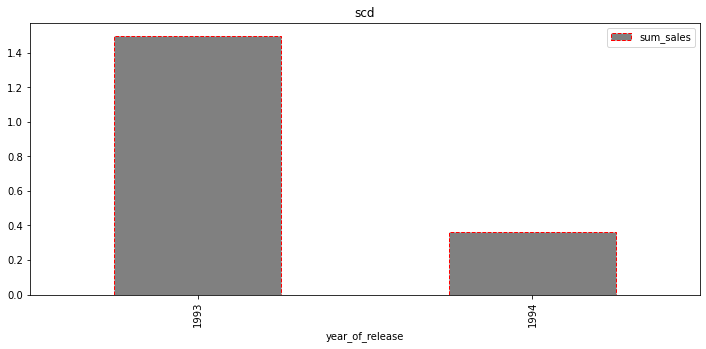

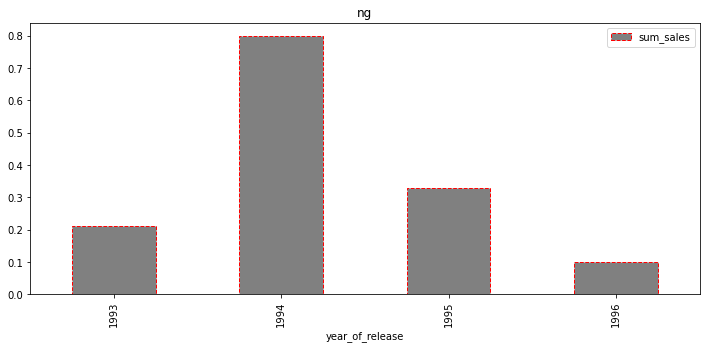

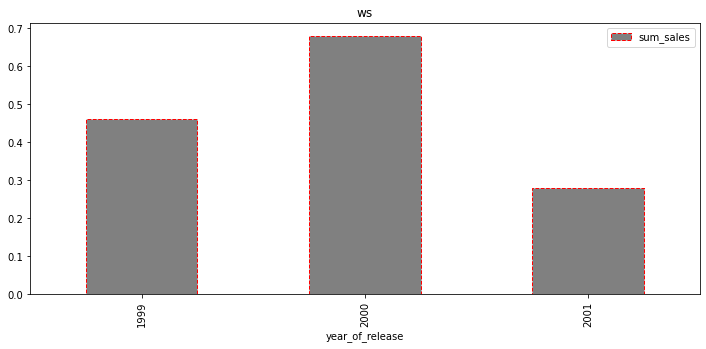

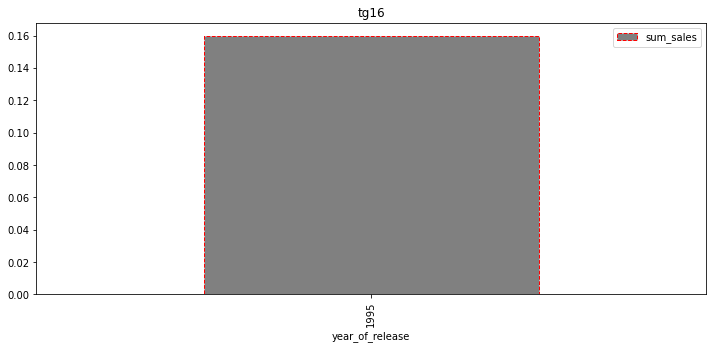

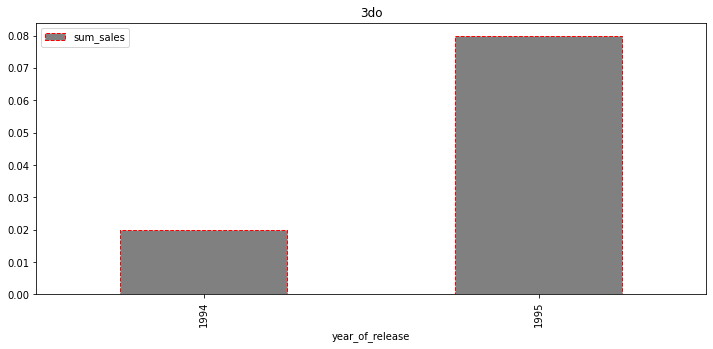

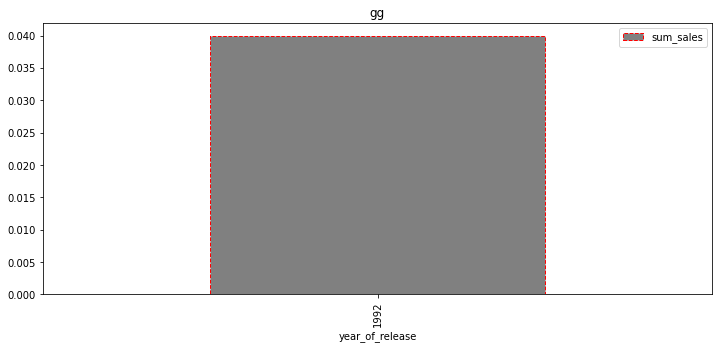

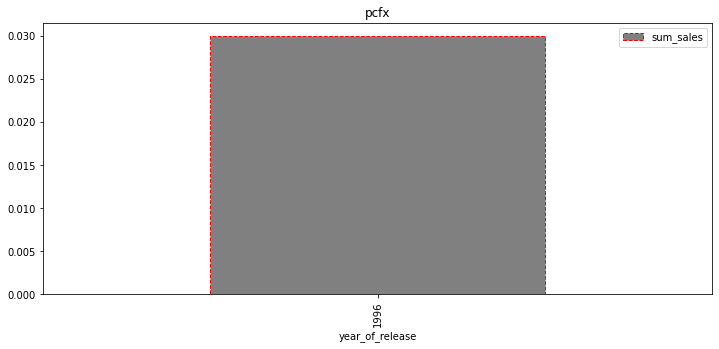

In [27]:
# Напишем цикл, который пройдётся по всем платформам, и построит график продаж каждой из них.
for platform in platforms_lst:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(12, 5), color='grey', edgecolor = 'red', linestyle = '--')
    plt.title(platform)

#### Промежуточные выводы:

- Самая долгоживущая платформа, это - PC.
- В среднем срок "жизни" платформы составляет 8-10 лет.
- Больше всего продаж было на платформах (В порядке убывания продаж): ps2, x360, ps3, wii, ds.

### Определим актуальный период:

На основании вышеописаных выводов, определим интервал с 2014г - 2016г, как актуальный

In [28]:
filtred_data = data[data['year_of_release'] >= 2014]
filtred_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,nv,14.630000
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.620001
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,nv,11.680000
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.580000
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,nv,7.980000
...,...,...,...,...,...,...,...,...,...,...,...,...
16555,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,nv,0.010000
16559,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,nv,0.010000
16562,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,nv,0.010000
16564,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,nv,0.010000


In [29]:
filtred_platform_pivot = filtred_data.pivot_table(index=['platform'], 
                                                  aggfunc={'sum_sales':sum}).nlargest(10, columns='sum_sales')
filtred_platform_pivot

,sum_sales
platform,
ps4,288.149994
xone,140.360001
3ds,86.680000
ps3,68.180000
x360,48.220001
wiiu,42.980000
pc,27.400000
psv,22.400000
wii,5.070000


Возьмём за актуальные платформы: pc, wiiu, ps4, 3ds, xone.


ps3, x360, и wii мы не будем рассматривать как актуальные платформы, так как их логичное продолжение это ps4, xone и wiiu соответственно

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

In [30]:
# Отфильтруем данные от аномалий и присвоим значения:
data_platform_sort = filtred_data[filtred_data['platform'].isin(['pc','wiiu','ps4','3ds','xone'])]
data_platform_sort = data_platform_sort[data_platform_sort['sum_sales'] != 0]
display(data_platform_sort['sum_sales'].describe())
print()
data_platform_sort.head(10)

count    1041.000000
mean        0.562507
std         1.271580
min         0.010000
25%         0.040000
50%         0.130000
75%         0.470000
max        14.630000
Name: sum_sales, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,nv,14.630000
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.620001
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,nv,11.680000
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.580000
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,nv,7.980000
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.660000
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.600000
96,super smash bros. for wii u and 3ds,3ds,2014,fighting,3.27,1.37,2.43,0.48,NaN,NaN,nv,7.550000
99,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,NaN,NaN,nv,7.390000
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.170000


In [31]:
# Сгруппируем по платформам:
data_platform_sort.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
pc,152.0,0.180263,0.328559,0.01,0.0200,0.060,0.2050,3.05
ps4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
wiiu,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
xone,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Text(0, 0.5, 'Продажи')

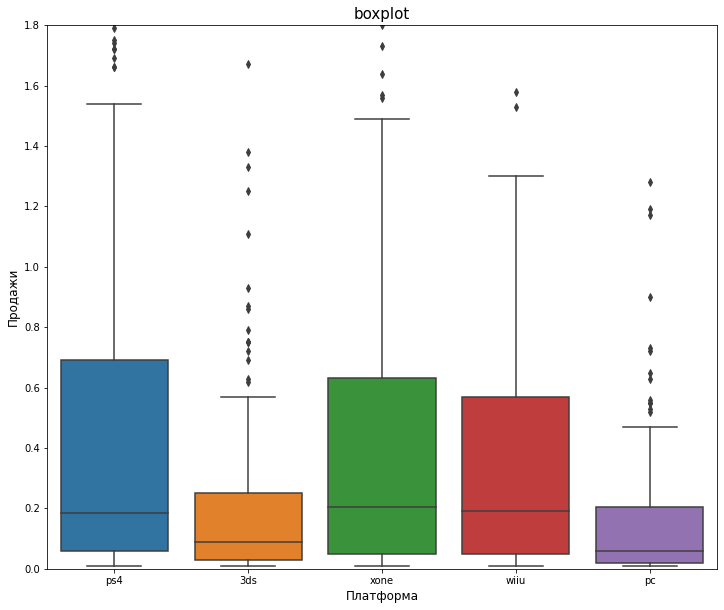

In [32]:
plt.figure(figsize = (12,10))
sns.boxplot(data = data_platform_sort, x='platform', y='sum_sales')
plt.ylim(0, 1.8)
plt.title('boxplot', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Промежуточные выводы:
- Больше всего игр было выпущено на ps4, меньше всех на wiiu.
- Самый высокий показатель медианы продаж у wiiu и xone. Самый низкий же у pc и 3ds.
- ps4, wiiu, xone являются самыми перспективными платформами в нашем временном промежутке.
- Данные подтверждаются реальным рыночным положением тех лет, игровые приставки сильно сместили в сегменте игр PC. А 3ds переживает уже свой "закат" ближе к 2016г.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:

Корреляция между оценкой критиков к продажам: 0.25720694464286015


Text(0.5, 1.0, 'pc')

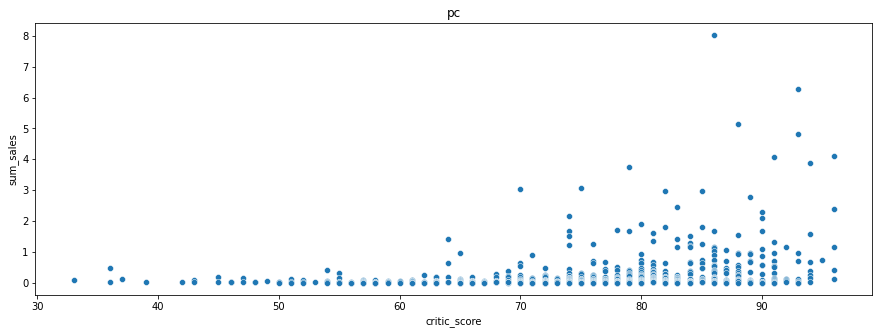

In [33]:
pc = data[data['platform']=='pc']

print('Корреляция между оценкой критиков к продажам:', pc['critic_score'].corr(pc['sum_sales']))

# Диаграмма рассеяния:
plt.figure(figsize=(15,5))
sns.scatterplot(x='critic_score', y='sum_sales', data=pc)
plt.title('pc')

Корреляция между оценками пользователей к продажам: 0.00985193683772468


Text(0.5, 1.0, 'pc')

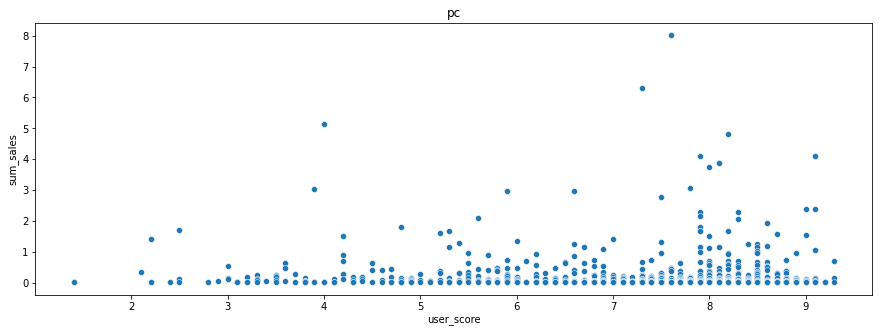

In [34]:
print('Корреляция между оценками пользователей к продажам:', pc['user_score'].corr(pc['sum_sales']))

# Диаграмма рассеяния:
plt.figure(figsize=(15,5))
sns.scatterplot(x='user_score', y='sum_sales', data=pc)
plt.title('pc')

Соотнесём с остальными платформами, напишем функцию:

In [35]:
# Функция, которая считает корреляцию и рисует графики:
def platform_func(name_of_platform):
    platform = data[data['platform'] == name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15, 5))
    sns.scatterplot(x = 'user_score', y = 'sum_sales', data = platform, ax = ax[0])
    sns.scatterplot(x = 'critic_score', y = 'sum_sales', data = platform, ax = ax[1])
    fig.suptitle(name_of_platform, fontsize = 15)
    ax[0].set(xlabel = 'Оценки пользователей')
    ax[1].set(xlabel = 'Оценки критиков')
    ax[0].set(ylabel = 'Количество продаж')
    ax[1].set(ylabel = 'Количество продаж')
    plt.show()   
    correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])

    if 0.25 >= critic_correl >= 0.1:
        print('Связь между отзывами критиков на -', name_of_platform.upper(), ': Корреляции нет', critic_correl)
    if 0.5 >= critic_correl >= 0.25:
        print('Связь между отзывами критиков на -', name_of_platform.upper(), ': Слабо выраженная корреляция', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Связь между отзывами критиков на -', name_of_platform.upper(), ': Средняя корреляция', critic_correl)
    if 1 >= critic_correl >= 0.7:
        print('Связь между отзывами критиков на -', name_of_platform.upper(), ': Высокая корреляция', critic_correl)
    
    if 0.25 >= correl >= 0.1:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Корреляции нет', correl)
    if 0.5 >= correl >= 0.25:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Слабо выраженная корреляция', correl)
    if 0.7 >= correl >= 0.5:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Средняя корреляция', correl)
    if 1 >= correl >= 0.7:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Высокая корреляция', correl)
    
    if 0.1 >= correl >= -0.25:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Корреляции нет', correl)
    if -0.25 >= correl >= -0.5:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Слабая обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Связь между отзывами пользователей на -', name_of_platform.upper(), ': Сильная обратная', correl)
    if -0.7 >= correl >= -1:
        print('\n')


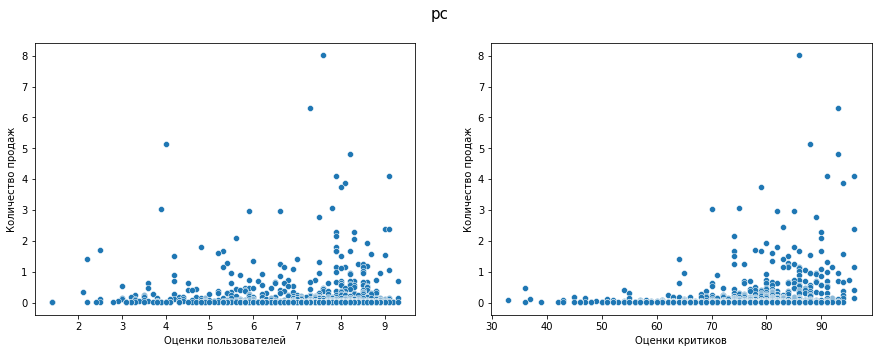

Связь между отзывами критиков на - PC : Слабо выраженная корреляция 0.25720694464286015
Связь между отзывами пользователей на - PC : Корреляции нет 0.00985193683772468


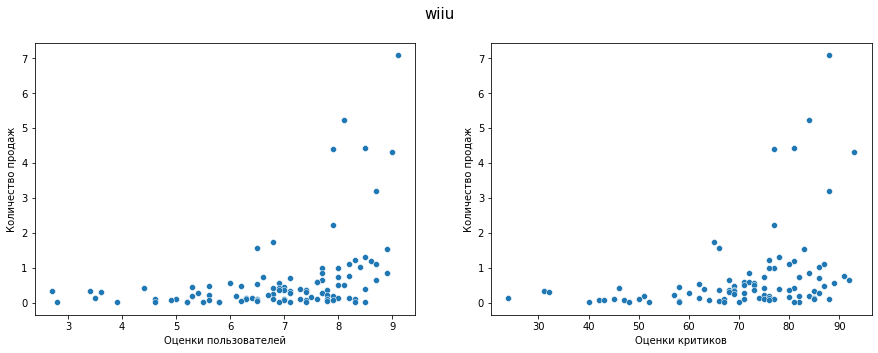

Связь между отзывами критиков на - WIIU : Слабо выраженная корреляция 0.3483797599500602
Связь между отзывами пользователей на - WIIU : Слабо выраженная корреляция 0.4002190371566136


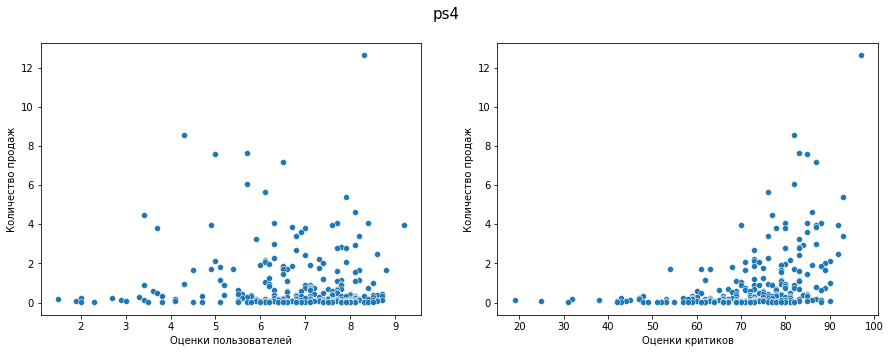

Связь между отзывами критиков на - PS4 : Слабо выраженная корреляция 0.40656790102834933
Связь между отзывами пользователей на - PS4 : Корреляции нет -0.031957105603966945


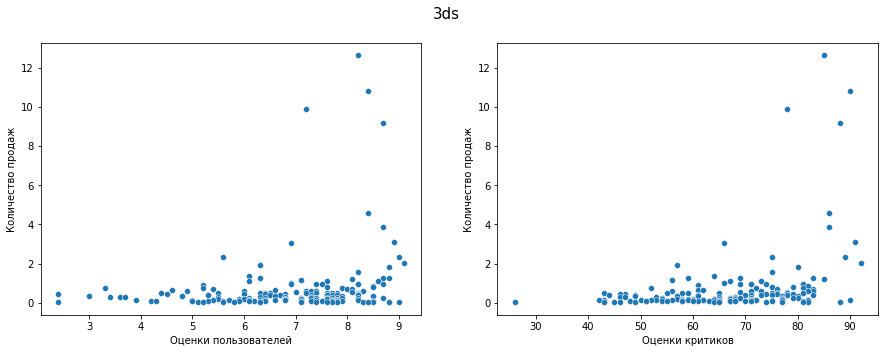

Связь между отзывами критиков на - 3DS : Слабо выраженная корреляция 0.34821555188872827
Связь между отзывами пользователей на - 3DS : Корреляции нет 0.2223050884823717


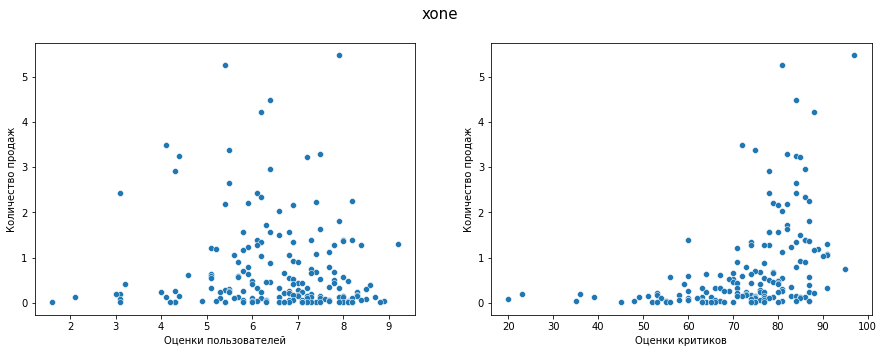

Связь между отзывами критиков на - XONE : Слабо выраженная корреляция 0.41699832684400107
Связь между отзывами пользователей на - XONE : Корреляции нет -0.06892505829722281


In [36]:
platform_list = ['pc','wiiu','ps4','3ds','xone']
for platform in platform_list:
    platform_func(platform)

Промежуточные выводы:
- Корреляция между отзывами к продажам либо отсутствует, либо очень слабо выражена, потому утверждать что есть какая-либо взаимосвязь мы не можем.
- Однако, в среднем корреляция к отзывам критиков чуть выше, чем к пользователям, потому можно предположить, что всё-же если пользователи и ориентируются на оценки, то предпочитают оценки критиков.

### Посмотрим на общее распределение игр по жанрам:

In [37]:
print('Данные по таблице:')
all_genre = filtred_data.pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
all_genre = all_genre.reset_index().rename_axis(None, axis=1)
all_genre.style.bar()

Данные по таблице:


,genre,sum_sales
0,shooter,0.515000
1,sports,0.180000
2,platform,0.140000
3,fighting,0.125000
4,role-playing,0.110000
5,simulation,0.100000
6,misc,0.090000
7,action,0.090000
8,racing,0.090000
9,strategy,0.060000


In [38]:
print('Актуальные платформы:')
plt_genre = data_platform_sort.pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
plt_genre = plt_genre.reset_index().rename_axis(None, axis=1)
plt_genre.style.bar()

Актуальные платформы:


,genre,sum_sales
0,shooter,0.540000
1,sports,0.240000
2,role-playing,0.200000
3,platform,0.190000
4,fighting,0.160000
5,action,0.110000
6,simulation,0.110000
7,misc,0.105000
8,racing,0.100000
9,adventure,0.060000


Text(0, 0.5, 'Продажи')

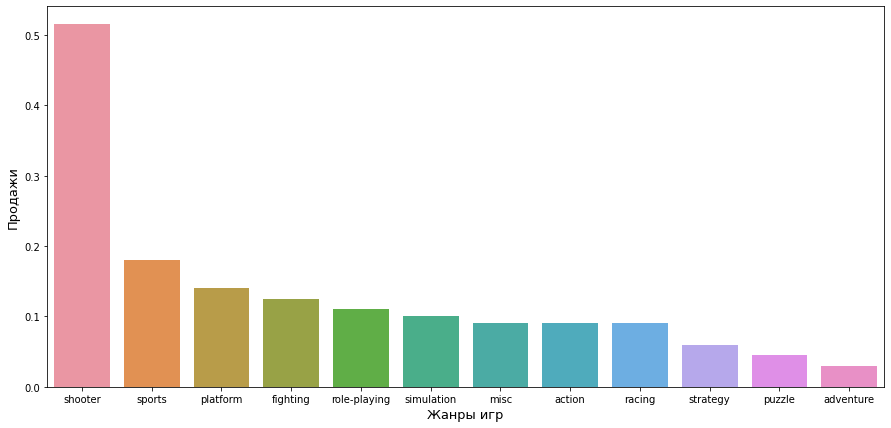

In [39]:
# Общая таблица:
plt.figure(figsize=(15,7))
sns.barplot(data = all_genre, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=13)
plt.ylabel('Продажи',fontsize=13)

Text(0, 0.5, 'Продажи')

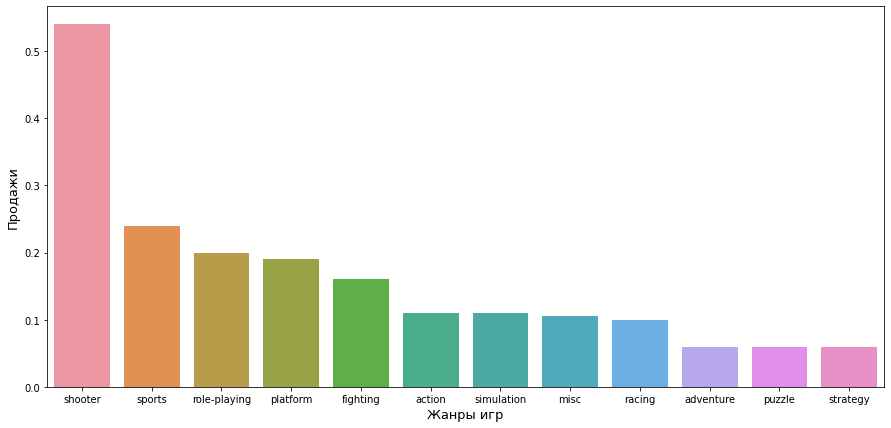

In [40]:
# Таблица по актуальным платформам:
plt.figure(figsize=(15,7))
sns.barplot(data = plt_genre, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=13)
plt.ylabel('Продажи',fontsize=13)

Промежуточные выводы:
- Самая высокая медиана цены у игр с жанром: shooter, sports, role-playing, platform и fighting.
- Самые отстающие жанры это - adventure, puzzle и strategy.
- Результаты данных вполне реальны, мало кто из нас сейчас предпочитает играть в пазлы, и стратегии. Также близки к "упадку" жанры гонок, симуляторы, и боевики.

## Составим портрет пользователя каждого региона:

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы:

In [41]:
top5_region = filtred_data.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
   
display(top5_region['eu_sales'].sort_values(ascending=False).head())
print()
display(top5_region['jp_sales'].sort_values(ascending=False).head())
print()
display(top5_region['na_sales'].sort_values(ascending=False).head())

platform
ps4     130.039993
xone     46.250000
ps3      25.539999
pc       18.219999
3ds      16.120001
Name: eu_sales, dtype: float32

platform
3ds     44.240002
ps4     15.020000
psv     14.540000
ps3     11.220000
wiiu     7.310000
Name: jp_sales, dtype: float32

platform
ps4     98.610001
xone    81.269997
x360    28.299999
3ds     22.639999
ps3     22.049999
Name: na_sales, dtype: float32

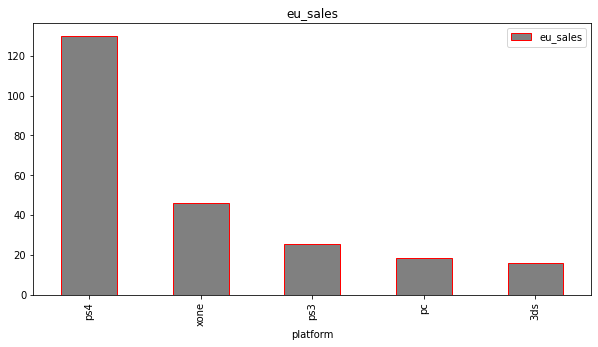

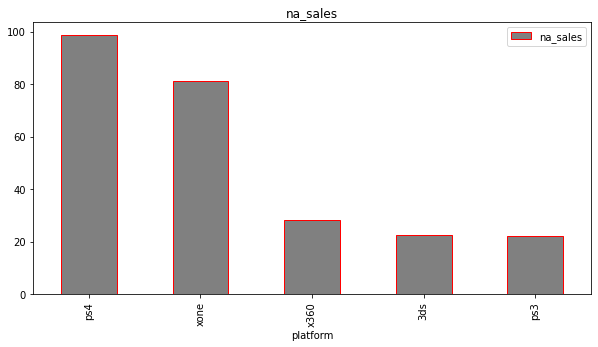

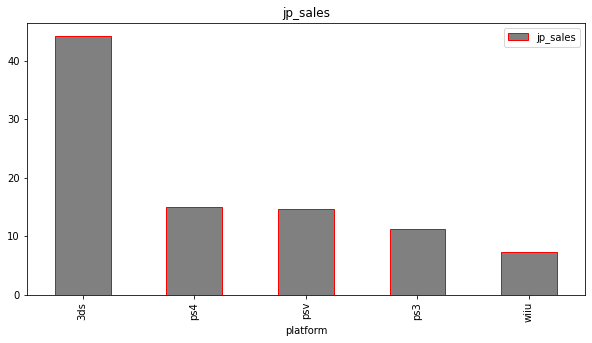

In [42]:
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    (top5_region
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i], color='gray', ec='red')
    )

Промежуточные выводы:
- В Европе топ 5 платформ: ps4, xone, ps3, pc. 3ds.
- В Северной Америке топ 5 платформ: ps4, xone, x360, 3ds и ps3.
- В Японии топ 5 платформ: 3ds, ps4, psv, ps3 и wiiu.
- Можно заметить, что в Америке и Японии пользователи консолей стараются играть на устройствах, произведенных в их регионе, в Европе же лист приставок можно назвать смешанным.

### Самые популярные жанры:

In [43]:
top5_genre = filtred_data.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
   
display(top5_genre['eu_sales'].sort_values(ascending=False).head())
print()
display(top5_genre['jp_sales'].sort_values(ascending=False).head())
print()
display(top5_genre['na_sales'].sort_values(ascending=False).head())

genre
action          74.930000
shooter         65.519997
sports          45.730000
role-playing    28.170000
racing          14.130000
Name: eu_sales, dtype: float32

genre
role-playing    31.16
action          29.58
fighting         6.37
misc             5.61
shooter          4.87
Name: jp_sales, dtype: float32

genre
shooter         79.019997
action          72.589996
sports          46.130001
role-playing    33.470001
misc            15.050000
Name: na_sales, dtype: float32

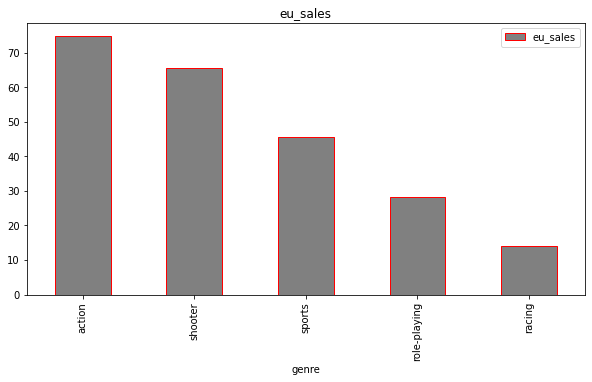

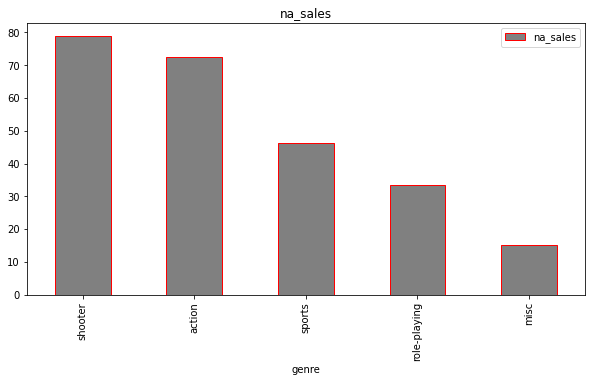

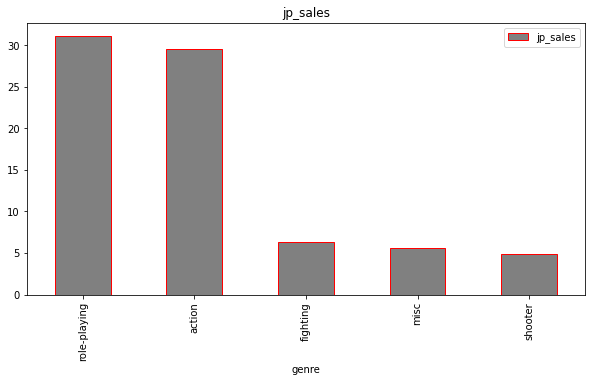

In [44]:
for i in range(0, 3):
    (top5_genre
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i], color='gray', ec='red')
    )

Промежуточные выводы:
- В Европе геймеры отдают предпочтение жанрам: action, shooter, sports, role-playing и racing.
- В Америке предпочитают жанры: shooter, action, sports, role-playing и misc.
- Америку и Европу можно назвать очень похожими рынками по общим предпочтениям пользователей.
- В Японии вкусы пользователей сильно отличаются, большинство предпочитает игры жанра role-playing. Далее идут: action, fighting, misc и shooter.
- Больше всего продаж игр приходится на Америку, возможно, это связано с большей заинтересованностью населением играми, и более развитой структурой гейминга, чем в Европе и Японии.

### Как влияет рейтинг ESRB на продажи:

In [45]:
esrb_region = filtred_data.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})

display(esrb_region['eu_sales'].sort_values(ascending=False).head())
print()
display(esrb_region['jp_sales'].sort_values(ascending=False).head())
print()
display(esrb_region['na_sales'].sort_values(ascending=False).head())

rating
m       93.690002
nv      58.950001
e       58.060001
t       34.070000
e10+    26.160000
Name: eu_sales, dtype: float32

rating
nv      56.900002
t       14.780000
e        8.940000
m        8.010000
e10+     4.460000
Name: jp_sales, dtype: float32

rating
m       96.480003
nv      64.720001
e       50.740002
t       38.950001
e10+    33.230000
Name: na_sales, dtype: float32

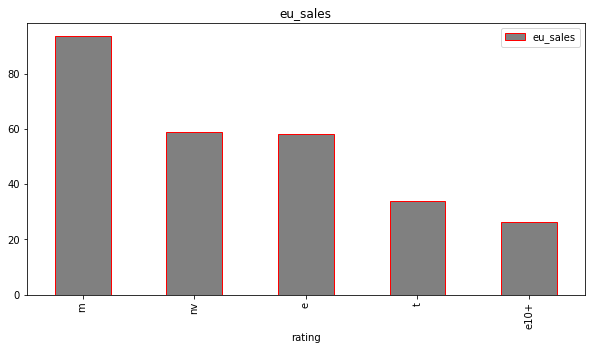

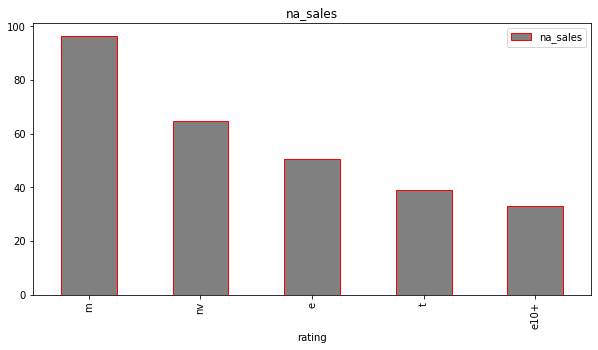

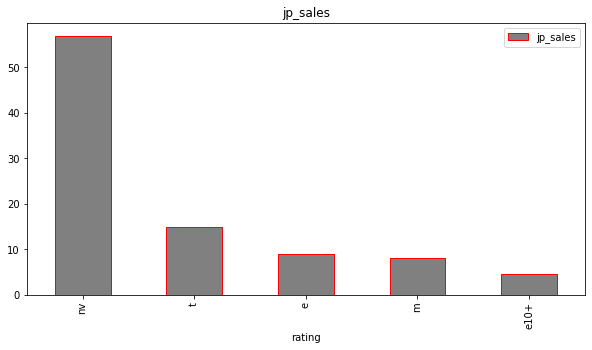

In [46]:
for i in range(0, 3):
    (esrb_region
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i], color='gray', ec='red')
    )

Пояснение по рейтингу:
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет 
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» 
- «T» («Teen») — «Подросткам» Игра подходит для лиц от 13 лет. 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет 
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- «NV» («No value») - «Нет значения»: В таблице эти данные были пустыми.

Промежуточный вывод:
- Для Европы и Америки картина максимально схожая. Лидирует возрастная категория "Для взрослых" (от 17 лет). Далее идёт категория "Нет значения", возможно, это связано с тем, что есть множество классификаций возрастного рейтинга, к примеру "PEGI", и по всей видимости некоторые игры получали возрастной рейтинг в других классификациях. Далее идёт категория для всех (от 6 лет), подросткам (от 13 лет) и замыкает топ 5: Для всех от 10 и старше. Такое распределение возможно связано с жанром экшн и шутер, где нередко рейтинг: "Для взрослых" частое явление.
- Япония отличается от рынков Европы и Америки. Для Японии на первом месте также идёт "Нет значения", в Японии продажа игр контролируется государством, и зачастую возрастной рейтинг присваивают в специальном бюро. Далее идёт: Подросткам (от 13 лет), а за ним уже следует категория для всех (от 6 лет). На 4 месте рейтинга для взрослых (от 17 лет), и замыкает для всех старше 10 лет. Такое отличие возможно из-за жанровых предпочтений, и различия культуры запада и азии.

## Проверим гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Проверка 1 гипотезы:

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [47]:
# Сохраним в переменные нужные данные за выбранный нами актуальный период и платформы:
xone_rat = filtred_data.query('platform == "xone"')['user_score'].dropna()
pc_rat = filtred_data.query('platform == "pc"')['user_score'].dropna()

# Посчитаем средний рейтинг:
print('Средний рейтинг XONE:', xone_rat.mean())
print('Средний рейтинг PC:', pc_rat.mean())

Средний рейтинг XONE: 6.5945444
Средний рейтинг PC: 6.3162603


In [48]:
# Проверим дисперсию выборок:
print('Дисперсия XONE:', np.var(xone_rat, ddof=1))
print('Дисперсия PC:', np.var(pc_rat, ddof=1))

Дисперсия XONE: 1.8910067
Дисперсия PC: 2.9167826


Разница между дисперсиями выборок составляет 0,3, поэтому зададим аргумент equal_var=False.

In [49]:
# Проверим гипотезу:
# Альфу поставим на 5%:
alpha = 0.05

results = st.ttest_ind(xone_rat, pc_rat, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1392388460531782
Не получилось отвергнуть нулевую гипотезу


p-значение равно примерно 13%, таким образом, мы не можем отвергнуть гипотезу о том, что рейтинги платформ одинаковые, что мы и можем увидеть по среднему рейтингу на 2-х платформах. Таким образом, мы подтверждаем 1 гипотезу.

### Проверка 2 гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [50]:
# Сохраним в переменные нужные данные за выбранный нами актуальный период и жанры:
action_rat = filtred_data.query('genre == "action"')['user_score'].dropna()
sports_rat = filtred_data.query('genre == "sports"')['user_score'].dropna()

# Посчитаем средний рейтинг:
print('Средний рейтинг action:', action_rat.mean())
print('Средний рейтинг sports:', sports_rat.mean())

Средний рейтинг action: 6.766443
Средний рейтинг sports: 5.225197


In [51]:
# Проверим дисперсию выборок:
print('Дисперсия action:', np.var(action_rat, ddof=1))
print('Дисперсия sports:', np.var(sports_rat, ddof=1))

Дисперсия action: 1.9022372
Дисперсия sports: 3.446979


Большая дисперсия между выборками, поэтому зададим аргумент equal_var=False.

In [52]:
# Проверим гипотезу:
# Альфу поставим на 5%:
alpha = 0.05

results = st.ttest_ind(action_rat, sports_rat, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.658223472925572e-15
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports различаются, таким образом, 2 гипотеза подтвердилась.

## Общий вывод:

**Мы провели довольно обширное исследование, и выявили множество важных факторов, которые влияют на успешность игровых тайтлов. Сами данные были достаточно "чистыми", и их не пришлось сильно восстанавливать. Вот некоторые итоговые факты, которые мы смогли отметить проводя наше исследование:**

- Больше всего было выпущено игр на платформах: PC2, DC, и PC3
- Рост индустрии игр начался с 1990 г, и далее рос огромными темпами.
- Количество игр резко стало расти примерно в 1993, и второй такой скачок пришелся на 2000.
- Сильные спады в разработке пришлись на 2003, в 2010 также начался резкий спад. Возможно это связано с тем, что бюджеты игр стали увеличиваться, как и сам рынок, и маленькие фирмы были поглощены гигантами индустрии.
- Так как новая тенденция стала видна после 2005 года, возьмём данные с этого года за актуальные на рынке.
- Самая долгоживущая платформа, это - PC.
- В среднем срок "жизни" платформы составляет 8-10 лет.
- Больше всего продаж было на платформах (В порядке убывания продаж): ps2, x360, ps3, wii, ds.
- Больше всего игр было выпущено на pc, меньше всех на wiiu.
- Больше всего игр было выпущено на ps4, меньше всех на wiiu.
- Самый высокий показатель медианы продаж у wiiu и xone. Самый низкий же у pc и 3ds.
- ps4, wiiu, xone являются самыми перспективными платформами в нашем временном промежутке.
- Данные подтверждаются реальным рыночным положением тех лет, игровые приставки сильно сместили в сегменте игр PC. А 3ds переживает уже свой "закат" ближе к 2016г.
- Корреляция между отзывами к продажам либо отсутствует, либо очень слабо выражена, потому утверждать что есть какая-либо взаимосвязь мы не можем.
- Однако, в среднем корреляция к отзывам критиков чуть выше, чем к пользователям, потому можно предположить, что всё-же если пользователи и ориентируются на оценки, то предпочитают оценки критиков.
- Самая высокая медиана цены у игр с жанром: shooter, sports, role-playing, platform и fighting.
- Самые отстающие жанры это - adventure, puzzle и strategy.
- Результаты данных вполне реальны, мало кто из нас сейчас предпочитает играть в пазлы, и стратегии. Также близки к "упадку" жанры гонок, симуляторы, и боевики.
- В Европе топ 5 платформ: ps4, xone, ps3, pc. 3ds.
- В Северной Америке топ 5 платформ: ps4, xone, x360, 3ds и ps3.
- В Японии топ 5 платформ: 3ds, ps4, psv, ps3 и wiiu.
- Можно заметить, что в Америке и Японии пользователи консолей стараются играть на устройствах, произведенных в их регионе, в Европе же лист приставок можно назвать смешанным.
- В Европе геймеры отдают предпочтение жанрам: action, shooter, sports, role-playing и racing.
- В Америке предпочитают жанры: shooter, action, sports, role-playing и misc.
- Америку и Европу можно назвать очень похожими рынками по общим предпочтениям пользователей.
- В Японии вкусы пользователей сильно отличаются, большинство предпочитает игры жанра role-playing. Далее идут: action, fighting, misc и shooter.
- Больше всего продаж игр приходится на Америку, возможно, это связано с большей заинтересованностью населением играми, и более развитой структурой гейминга, чем в Европе и Японии.
- Для Европы и Америки в возрастном рейтинге картина максимально схожая. Лидирует возрастная категория "Для взрослых" (от 17 лет). Далее идёт категория "Нет значения", возможно, это связано с тем, что есть множество классификаций возрастного рейтинга, к примеру "PEGI", и по всей видимости некоторые игры получали возрастной рейтинг в других классификациях. Далее идёт категория для всех (от 6 лет), подросткам (от 13 лет) и замыкает топ 5: Для всех от 10 и старше. Такое распределение возможно связано с жанром экшн и шутер, где нередко рейтинг: "Для взрослых" частое явление.
- Япония отличается от рынков Европы и Америки. Для Японии на первом месте также идёт "Нет значения", в Японии продажа игр контролируется государством, и зачастую возрастной рейтинг присваивают в специальном бюро. Далее идёт: Подросткам (от 13 лет), а за ним уже следует категория для всех (от 6 лет). На 4 месте рейтинга для взрослых (от 17 лет), и замыкает для всех старше 10 лет. Такое отличие возможно из-за жанровых предпочтений, и различия культуры запада и азии.
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports различаются.